In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import Add,concatenate
from tensorflow.keras.layers import Input
from tensorflow.keras import Model
from sklearn.model_selection import train_test_split

In [25]:
#from google.colab import files
#uploaded = files.upload()
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
cd 'drive/My Drive/ECE 657/Part-2/'

[Errno 2] No such file or directory: 'drive/My Drive/ECE 657/Part-2/'
/content/drive/My Drive/ECE 657/Part-2


In [27]:
train = pd.read_csv('train.csv')
test = pd.read_csv('testX.csv')
train.describe()

,Id,Label,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,39999.500000,2.002933,0.000483,0.006067,0.033700,0.090450,0.241383,0.392517,0.777333,2.158300,5.597000,14.485433,32.866333,45.783900,51.985883,50.779350,50.425750,53.686350,51.371150,40.467633,25.962700,10.281083,4.034833,1.929250,1.148100,0.842217,0.47675,0.262000,0.08960,0.015167,0.004783,0.020917,0.102850,0.339433,0.741917,2.058883,7.226483,17.394200,32.014417,53.019567,...,92.459967,90.458233,79.041600,62.473383,46.021650,44.367617,47.964333,38.793683,22.335200,9.189950,3.814733,0.622083,0.024617,0.220950,1.03375,4.379250,12.673967,21.02115,21.219867,17.159950,22.219717,30.688333,41.950650,51.574867,52.491717,46.289000,42.470617,45.183467,50.020433,46.359133,34.545900,23.297883,16.652150,17.953617,22.969333,17.967350,8.525333,2.753883,0.832950,0.072850
std,17320.652413,1.415000,0.061507,0.292286,1.178115,2.306445,4.365543,5.702057,8.023953,13.942884,23.572943,38.252977,57.692077,65.947637,68.565341,67.919718,67.397257,69.421676,67.915419,62.725940,51.620728,32.300648,20.015361,13.871987,10.593331,9.214058,7.01254,5.295104,2.78752,1.048501,0.361104,1.133843,3.104964,6.149413,9.589874,15.716790,29.936239,47.877737,65.585449,82.247678,...,100.881732,99.700169,95.036194,88.766993,78.686045,77.236284,83.267721,74.407819,55.982185,37.736031,24.425300,8.175978,1.009238,4.416291,10.07838,20.894199,37.020302,49.07243,48.312498,42.208942,48.438714,55.116266,62.242895,68.555227,69.759801,67.367902,66.182219,66.754477,68.685723,66.060666,57.569109,48.952580,42.147395,43.985951,51.856475,45.225807,29.529071,17.396211,9.263115,2.131444
min,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24999.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.

In [28]:
train['Label'].unique()

array([4, 0, 1, 2, 3])

In [29]:
batch_size = 1024
num_classes = 5
epochs = 300
img_rows, img_cols = 28, 28

x_train = train.drop(['Label', 'Id'], axis=1).to_numpy()
y_train = train['Label'].to_numpy()
x_test = test.drop(['Id'], axis = 1).to_numpy()

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 42)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_val = tensorflow.keras.utils.to_categorical(y_val, num_classes)

print(x_val.shape)
print(y_val)

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')

x_train /= 255
x_val /= 255

(6000, 28, 28, 1)
[[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [30]:
#Resnet 92.03
inputs =  Input(shape = (28,28,1))
x = Conv2D(32, kernel_size=(5,5), activation='relu', padding = 'same', input_shape = input_shape)(inputs)
shortcut = x
x = Conv2D(32, kernel_size=(5,5), activation='relu', padding = 'same')(x)

x = Add()([x, shortcut])
x = Activation('relu')(x)

x = MaxPooling2D(pool_size=(2,2))(x)


x = Conv2D(64, kernel_size=(3,3), activation='relu', padding = 'same')(x)
shortcut = x
x = Conv2D(64, kernel_size=(3,3), activation='relu', padding = 'same')(x)

x = Add()([x, shortcut])
x = Activation('relu')(x)

x = MaxPooling2D(pool_size=(2,2))(x)

x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.25)(x)
pred = Dense(num_classes, activation='softmax')(x)

model = Model(inputs = inputs, outputs = pred)

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr=0.0008), metrics = ['accuracy'])

model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 28, 28, 32)   832         input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 28, 28, 32)   25632       conv2d_16[0][0]                  
__________________________________________________________________________________________________
add_8 (Add)                     (None, 28, 28, 32)   0           conv2d_17[0][0]                  
                                                                 conv2d_16[0][0]            

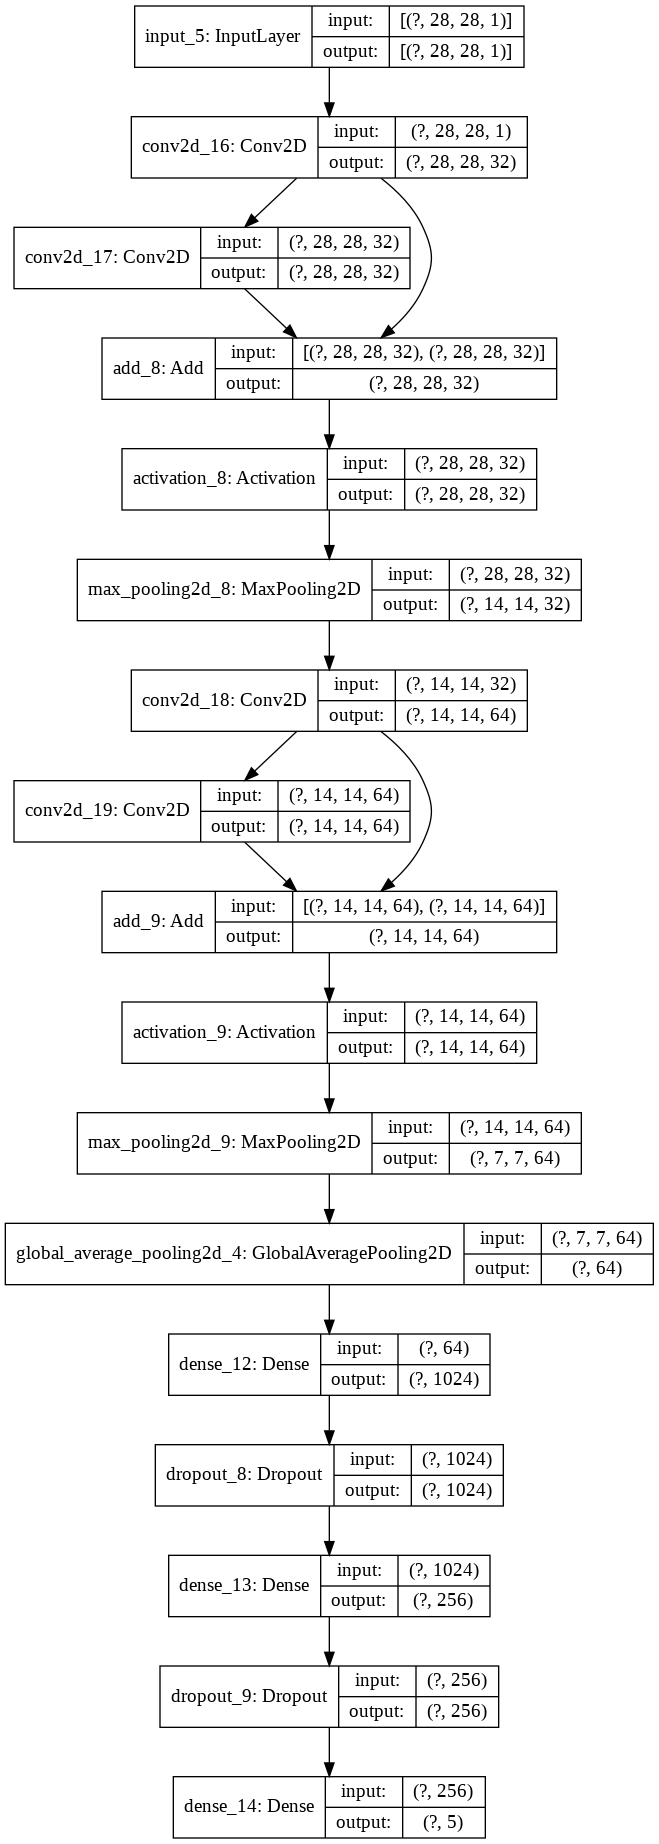

In [31]:
import tensorflow as tf
tf.keras.utils.plot_model(
    model, to_file='resnet_model.png', show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

In [32]:
history = model.fit(x_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_data = (x_val, y_val))

Epoch 1/300
53/53 [==============================] - 2s 35ms/step - loss: 1.2784 - accuracy: 0.4044 - val_loss: 1.0612 - val_accuracy: 0.5268
Epoch 2/300
53/53 [==============================] - 2s 33ms/step - loss: 1.0026 - accuracy: 0.5651 - val_loss: 0.9542 - val_accuracy: 0.5840
Epoch 3/300
53/53 [==============================] - 2s 33ms/step - loss: 0.8746 - accuracy: 0.6238 - val_loss: 0.7788 - val_accuracy: 0.6740
Epoch 4/300
53/53 [==============================] - 2s 33ms/step - loss: 0.7427 - accuracy: 0.6943 - val_loss: 0.7038 - val_accuracy: 0.7097
Epoch 5/300
53/53 [==============================] - 2s 33ms/step - loss: 0.6939 - accuracy: 0.7163 - val_loss: 0.6341 - val_accuracy: 0.7457
Epoch 6/300
53/53 [==============================] - 2s 33ms/step - loss: 0.6507 - accuracy: 0.7354 - val_loss: 0.6040 - val_accuracy: 0.7503
Epoch 7/300
53/53 [==============================] - 2s 33ms/step - loss: 0.6096 - accuracy: 0.7503 - val_loss: 0.5360 - val_accuracy: 0.7842
Epoch 

In [38]:
import time
start = time.time()
score = model.evaluate(x_val, y_val, verbose = 0)
end = time.time()
print(end-start)

0.36141109466552734


In [40]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

# predict probabilities for test set
yhat_probs = model.predict(x_val, verbose=0)

yhat_classes = yhat_probs.argmax(axis=-1)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_val.argmax(axis=-1), yhat_classes)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_val.argmax(axis=-1), yhat_classes, average = 'micro')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_val.argmax(axis=-1), yhat_classes, average = 'micro')
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_val.argmax(axis=-1), yhat_classes, average = 'micro')
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_val.argmax(axis=-1), yhat_classes)
print('Cohens kappa: %f' % kappa)

# ROC AUC
auc = roc_auc_score(y_val, yhat_probs)
print('ROC AUC: %f' % auc)

matrix = multilabel_confusion_matrix(y_val.argmax(axis=-1), yhat_classes, labels = [0,1,2,3,4])
print(matrix)

#Reference:
#https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin

Accuracy: 0.908000
Precision: 0.908000
Recall: 0.908000
F1 score: 0.908000
Cohens kappa: 0.885001
ROC AUC: 0.991070
[[[4737   73]
  [  41 1149]]

 [[4646  124]
  [ 148 1082]]

 [[4663  155]
  [ 133 1049]]

 [[4676  149]
  [ 135 1040]]

 [[4726   51]
  [  95 1128]]]


In [41]:
x_test = test.drop(['Id'], axis = 1).to_numpy()
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_test = x_test.astype('float32')
x_test /= 255
y_sol = model.predict(x_test)
y_sol = y_sol.argmax(axis=-1)
y_sol

array([3, 4, 0, ..., 3, 1, 2])

In [0]:
df_solution = pd.DataFrame(np.arange(0, x_test.shape[0]), columns=['Id'])
df_solution['Label'] = y_sol

In [43]:
df_solution

,Id,Label
0,0,3
1,1,4
2,2,0
3,3,1
4,4,3
...,...,...
9995,9995,1
9996,9996,1
9997,9997,3
9998,9998,1
